<a href="https://colab.research.google.com/github/PavithNimantha/AutismoTech/blob/Chethiya/Emotion%20detection%20results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gdown

In [18]:
import gdown

# Google Drive file ID from the shared link
file_id = "1s65T0loGBqQj1lx-jYrihqpA1tZhqnoi"
output_file = "emotion_model.h5"  # Desired file name

# Construct the download URL and download the file
gdown.download(f"https://drive.google.com/uc?id={file_id}", output_file, quiet=False)

print("Model downloaded successfully!")

Downloading...
From: https://drive.google.com/uc?id=1s65T0loGBqQj1lx-jYrihqpA1tZhqnoi
To: /content/emotion_model.h5
100%|██████████| 50.9M/50.9M [00:00<00:00, 64.0MB/s]


Model downloaded successfully!


In [3]:
import tensorflow as tf

# Load the emotion detection model
model = tf.keras.models.load_model("emotion_model.h5")
print("Model loaded successfully!")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Model loaded successfully!


In [4]:
# Emotion labels corresponding to the model's output classes
emotion_dict = {
    0: 'Angry',
    1: 'Disgust',
    2: 'Fear',
    3: 'Happy',
    4: 'Sad',
    5: 'Surprise',
    6: 'Neutral'
}

In [39]:
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Upload multiple images
uploaded = files.upload()

# Preprocess uploaded images
images = []
true_labels = []  # Add true labels if you want to evaluate accuracy
for file_name in uploaded.keys():
    img = load_img(file_name, target_size=(48, 48), color_mode='grayscale')  # Load as grayscale
    img_array = img_to_array(img) / 255.0  # Normalize pixel values
    images.append(img_array)
    # Add true label if available, e.g., true_labels.append(3) for 'Happy'

images = np.array(images).reshape(-1, 48, 48, 1)  # Add batch dimension

Saving Training_50580.jpg to Training_50580 (1).jpg
Saving Training_169588.jpg to Training_169588 (1).jpg
Saving Training_233976.jpg to Training_233976 (6).jpg
Saving Training_267631.jpg to Training_267631 (1).jpg
Saving Training_336818.jpg to Training_336818 (1).jpg
Saving Training_397587.jpg to Training_397587 (4).jpg
Saving Training_680349.jpg to Training_680349 (1).jpg
Saving Training_2408820.jpg to Training_2408820 (1).jpg


In [43]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Process multiple uploaded images
images = []  # List to store processed images
image_names = []  # List to store image names

for image_path in uploaded.keys():  # Iterate through all uploaded image files
    img = load_img(image_path, target_size=(48, 48), color_mode='grayscale')  # Load as grayscale
    img_array = img_to_array(img) / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    images.append(img_array)  # Append the processed image
    image_names.append(image_path)  # Append the image file name

# Combine all processed images into a single numpy array
images = np.vstack(images)

print(f"Processed {len(images)} images successfully!")

Processed 8 images successfully!


In [44]:
# Predict emotions for all preprocessed images
predictions = model.predict(images)

# Map predictions to emotion labels for each image
predicted_emotions = [emotion_dict[np.argmax(pred)] for pred in predictions]

# Display predictions for each image
for image_name, emotion in zip(image_names, predicted_emotions):
    print(f"Image: {image_name} - Predicted Emotion: {emotion}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Image: Training_50580 (1).jpg - Predicted Emotion: Happy
Image: Training_169588 (1).jpg - Predicted Emotion: Happy
Image: Training_233976 (6).jpg - Predicted Emotion: Angry
Image: Training_267631 (1).jpg - Predicted Emotion: Angry
Image: Training_336818 (1).jpg - Predicted Emotion: Neutral
Image: Training_397587 (4).jpg - Predicted Emotion: Angry
Image: Training_680349 (1).jpg - Predicted Emotion: Disgust
Image: Training_2408820 (1).jpg - Predicted Emotion: Disgust


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


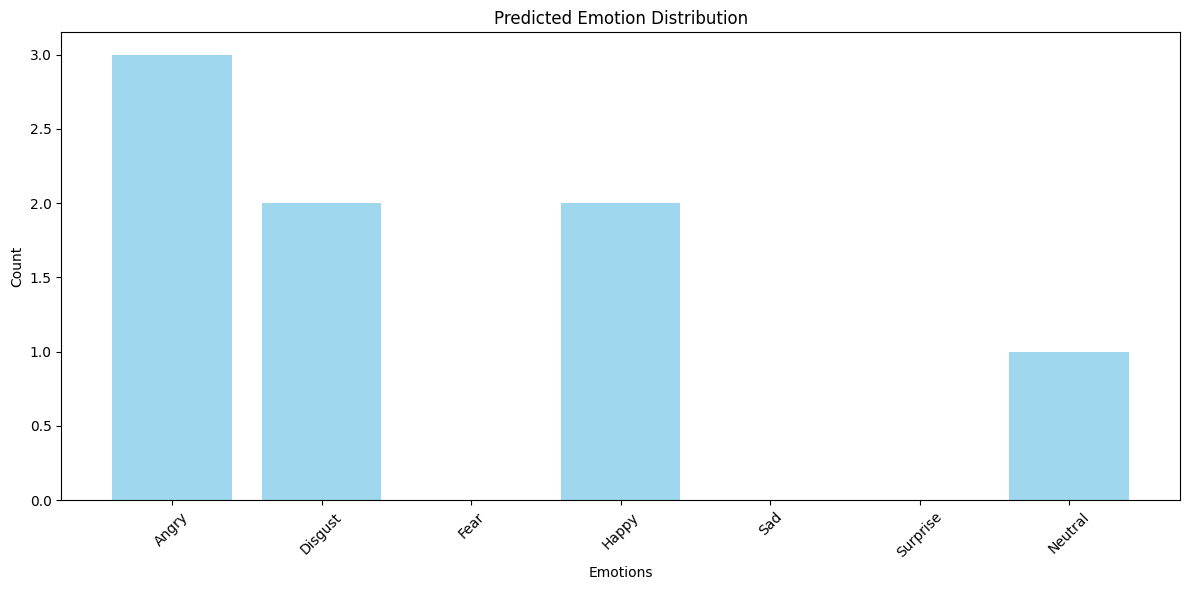

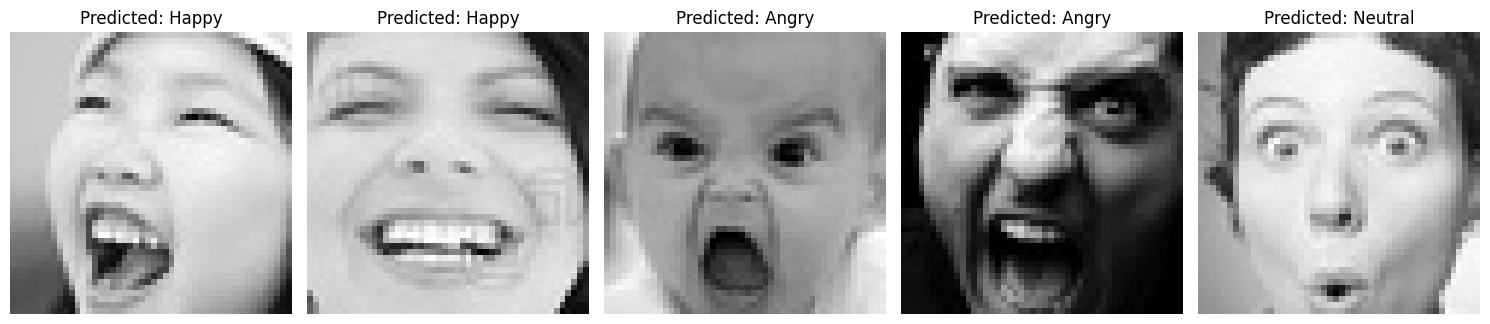

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Predict emotions for all preprocessed images
predictions = model.predict(images)

# Map predictions to emotion labels
predicted_labels = [np.argmax(pred) for pred in predictions]
predicted_emotions = [emotion_dict[label] for label in predicted_labels]

# Create a bar graph for predicted emotions
emotion_counts = {emotion: predicted_emotions.count(emotion) for emotion in emotion_dict.values()}

# Bar graph for predicted emotions
plt.figure(figsize=(12, 6))
plt.bar(emotion_counts.keys(), emotion_counts.values(), color='skyblue', alpha=0.8)
plt.title("Predicted Emotion Distribution")
plt.xlabel("Emotions")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot sample images with their predicted emotions
fig, axes = plt.subplots(1, min(5, len(images)), figsize=(15, 5))  # Display up to 5 images
for idx, ax in enumerate(axes):
    ax.imshow(images[idx].reshape(48, 48), cmap='gray')
    ax.set_title(f"Predicted: {predicted_emotions[idx]}")
    ax.axis('off')
plt.tight_layout()
plt.show()